In [2]:
import ROOT

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import mplhep as hep

plt.style.use(hep.style.ATLAS)

import iminuit 
from iminuit import Minuit

Welcome to JupyROOT 6.24/02



****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      94.8187
NDf                       =           65
Edm                       =  2.82422e-07
NCalls                    =           83
p0                        =      1.60767   +/-   0.0195872    	 (limited)
p1                        =     0.330449   +/-   0.0292561    	 (limited)
p2                        =      0.27674   +/-   0.0539643    	 (limited)
p3                        =     0.340476   +/-   0.0580849    	 (limited)


Warning in <TROOT::Append>: Replacing existing TH1: h_mlk (Potential memory leak).


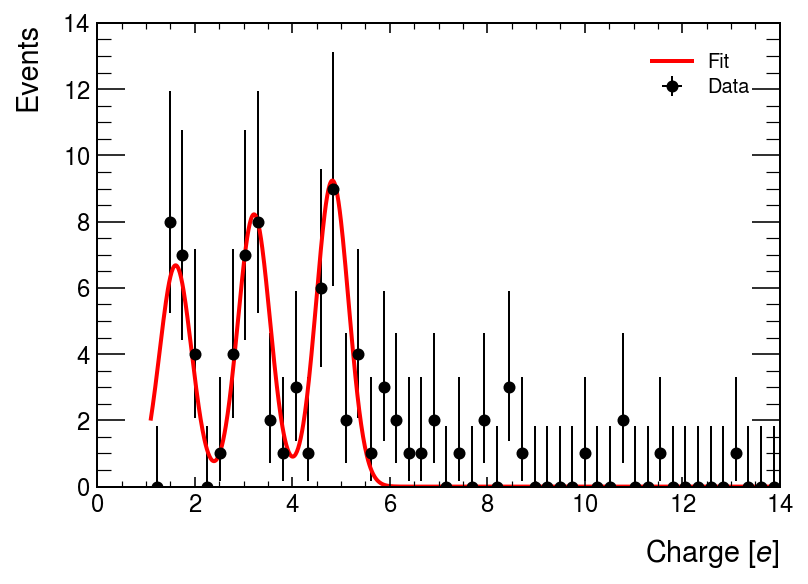

In [16]:

data = ROOT.TTree('mlk', '')
data.ReadFile('Millikan.txt', 't/D')
h_mlk = ROOT.TH1D('h_mlk', '', 50, 1.1, 14)
data.Draw('t >> h_mlk')

f = ROOT.TF1('f', '[2]*TMath::Gaus(x, [0], [1], 1) + [3]*TMath::Gaus(x, 2*[0], [1], 1) + (1-[2]-[3])*TMath::Gaus(x, 3*[0], [1], 1)')
f.SetParameters(1.6, 0.3, 0.3, 0.3);
f.SetParLimits(0, 1.5, 1.7)
f.SetParLimits(1, 0, 0.5)
f.SetParLimits(2, 0, 1)
f.SetParLimits(3, 0, 1)
data.UnbinnedFit('f', 't', 't<5.8');

hep.histplot(h_mlk, histtype='errorbar', color = 'k', label = 'Data')
N = 1000
x = np.linspace(h_mlk.GetXaxis().GetXmin(), h_mlk.GetXaxis().GetXmax(), N)

def fcn(x, p):
    return (
        p[2] * ROOT.TMath.Gaus(x, p[0], p[1], 1) + 
        p[3] * ROOT.TMath.Gaus(x, 2 * p[0], p[1], 1) + 
        (1 - p[2] - p[3]) * ROOT.TMath.Gaus(x, 3 * p[0], p[1], 1)
    )

p = f.GetParameters()
f_mlk = np.array([fcn(x[i], p) for i in range(N)])
plt.plot(x, 20*f_mlk, color = 'r', label = 'Fit')
plt.legend()
plt.xlabel('Charge [$e$]')
plt.ylabel('Events')
plt.savefig('../report/fig/millikan.pdf', bbox_inches = 'tight') 

In [10]:
from uncertainties import ufloat
e = ufloat(f.GetParameter(0), f.GetParError(0))
print(f'{e = :.2uS}')

e = 1.608(20)


In [11]:
from scipy.constants import elementary_charge
elementary_charge

1.602176634e-19